In [1]:
# P. Barry Seavey
# PRED 454-55, Winter 2018
# project 2
# kaggle.com 'Facial Keypoints Detection'

In [2]:
# --- EDA ---

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.utils import shuffle

In [5]:
import os
print(os.listdir('../Facial Keypoints'))

['.ipynb_checkpoints', '15_pt_1.PNG', '4 Traditional White with Purple.pptx', '4_pt_1.PNG', 'clean-white-brick-wall-textures-plain-820x532.jpg', 'CNN2_128-500-500-30_augmentdata.h5', 'CNN2_128-500-500-30_dropout.h5', 'CNN2_128-500-500-30_v1.h5', 'CNN_500-90-30_v2.h5', 'CNN_500-90-30_v5.h5', 'df_dump.PNG', 'face_model.h5', 'Fac_Kpt_1stCNNModel.ipynb', 'Fac_Kpt_1stModel.ipynb', 'Fac_Kpt_CNN-m2-flipnonull.ipynb', 'Fac_Kpt_CNN-model2-augmentdata.ipynb', 'Fac_Kpt_CNN-num2-dropout.ipynb', 'Fac_Kpt_CNN-num2.ipynb', 'Fac_Kpt_EDA1.ipynb', 'Fac_Kpt_img-extraction.ipynb', 'Fac_Kpt_nullpredict.ipynb', 'FKPt - imputedata1.ipynb', 'FKPt_CNN-batchnorm.ipynb', 'FKPt_CNN-m2-ensemble_augdata.ipynb', 'IdLookupTable.csv', 'imgs', 'KPT_500-90-30.h5', 'model2_augmentdata.csv', 'model2_flipnonull.csv', 'model2_v1.csv', 'model2_withdrop.csv', 'nigel.jpg', 'pic1.png', 'SampleSubmission.csv', 'Screen_Caps', 'Seavey_base_500-90-30_v2.csv', 'Seavey_base_500-90-30_v3.csv', 'Seavey_base_500-90-30_v4.csv', 'Seavey_f

In [6]:
#

In [7]:
FROOT = os.getcwd() # Path to your project folder
FTRAIN = FROOT + '/training.csv'
FTEST = FROOT + '/test.csv'
FLOOKUP = FROOT + '/IdLookupTable.csv'

In [8]:
def load(test = False, cols = None):
    """
    Loads the dataset.
    
    Parameters
    ----------
    test  : optional, defaults to `False`
            Flag indicating if we need to load from `FTEST` (`True`) or `FTRAIN` (`False`)
    cols  : optional, defaults to `None`
            A list of columns you're interested in. If specified only returns these columns.
               
    Returns
    -------
    A tuple of X and y, if `test` was set to `True` y contains `None`.    
    """
    
    fname = FTEST if test else FTRAIN
    df = pd.read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep = ' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=123)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

In [9]:
def plt_sample(num):
    img = X[num].reshape(96, 96)
    #
    plt.imshow(img, cmap='gray')
    plt.scatter(y[num][0::2] * 48 + 48, y[num][1::2] * 48 + 48, marker='x', s=10, color='red')

In [10]:
X, y = load()  # loads train data only

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [13]:
X

array([[ 0.36862746,  0.37254903,  0.3764706 , ...,  0.60784316,
         0.54901963,  0.56078434],
       [ 0.71764708,  0.72549021,  0.72549021, ...,  0.05490196,
         0.05882353,  0.05882353],
       [ 0.5411765 ,  0.29019609,  0.23529412, ...,  0.62352943,
         0.63529414,  0.63529414],
       ..., 
       [ 0.14901961,  0.09411765,  0.07058824, ...,  0.26666668,
         0.11764706,  0.14901961],
       [ 0.56862748,  0.56862748,  0.57254905, ...,  0.56862748,
         0.50980395,  0.52549022],
       [ 0.11764706,  0.12156863,  0.15294118, ...,  0.10980392,
         0.10588235,  0.10980392]], dtype=float32)

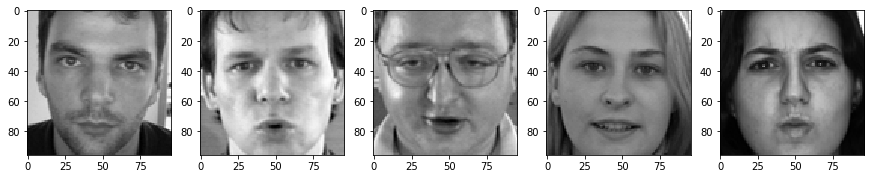

In [11]:
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = X[i].reshape(96, 96)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

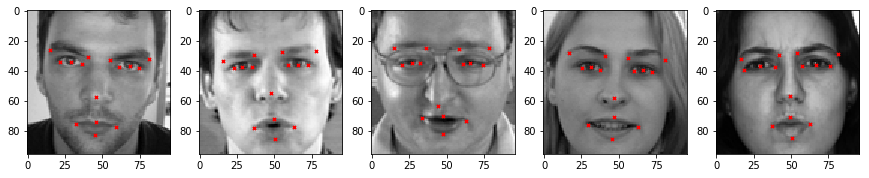

In [12]:
fig = plt.figure(figsize=(18, 18))

for i in range(1, 6):
    axis = fig.add_subplot(1, 6, i+1)
    plt_sample(i)
    #plt.scatter(y[i][0::2] * 48 + 48, y[i][1::2] * 48 + 48, marker='x', s=10, color='red')

plt.show()

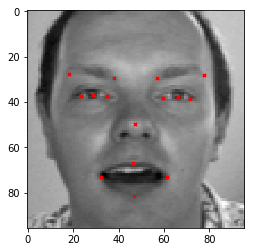

In [12]:
plt_sample(11)

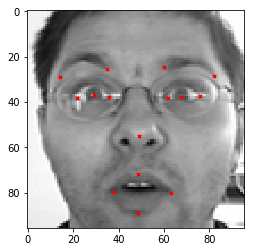

In [29]:
plt_sample(171)

In [14]:
X.shape

(2140, 9216)

In [13]:
import tensorflow as tf

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(Dense(100, input_dim=9216))
model.add(Activation('relu'))
model.add(Dense(30))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
hist = model.fit(X, y, epochs=100, validation_split=0.2)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 2s - loss: 0.0803 - val_loss: 0.0141
Epoch 2/100
1712/1712 [==============================] - 0s - loss: 0.0127 - val_loss: 0.0129
Epoch 3/100
1712/1712 [==============================] - 0s - loss: 0.0111 - val_loss: 0.0106
Epoch 4/100
1712/1712 [==============================] - 0s - loss: 0.0101 - val_loss: 0.0097
Epoch 5/100
1712/1712 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0117
Epoch 6/100
1712/1712 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0087
Epoch 7/100
1712/1712 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0087
Epoch 8/100
1712/1712 [==============================] - 0s - loss: 0.0079 - val_loss: 0.0101
Epoch 9/100
1712/1712 [==============================] - 0s - loss: 0.0077 - val_loss: 0.0078
Epoch 10/100
1712/1712 [==============================] - 0s - loss: 0.0075 - val_loss: 0.0077
Epoch 11/100

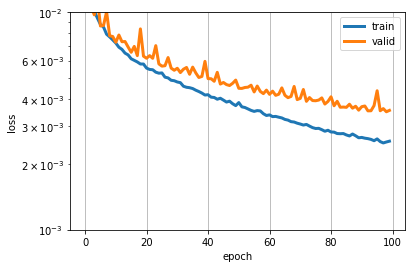

In [16]:
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(1e-3, 1e-2)
plt.yscale('log')
plt.show()

In [18]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10, color='yellow')

ImageId    1783
Image      1783
dtype: int64


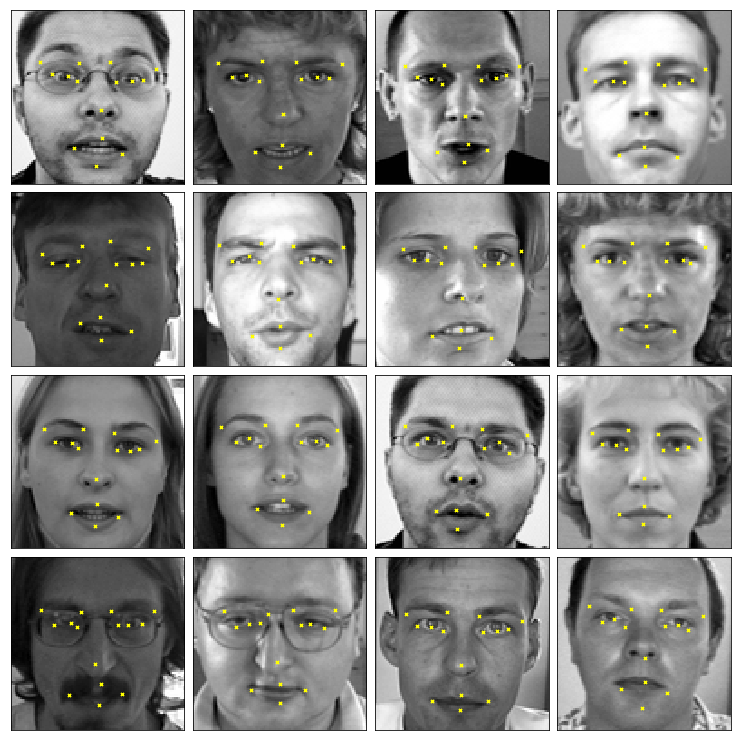

In [19]:
X_test, _ = load(test=True)
y_test = model.predict(X_test)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()